In [60]:
#libraries
import sys
import collections
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mode
from scipy.spatial.distance import squareform
import seaborn as sns
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
from sklearn import utils
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import time

plt.style.use('bmh')
%matplotlib inline

In [2]:
#import the dataset
pet = pd.read_csv('data/all_train_features.csv', sep = ',')
pet.describe()

,Type,Age,Age_Yr,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,2017GDPpercapita_USD,2017GDPpercapita_RM,segmentation_cluster,dullness,whiteness,image_size,width,height,blurrness,colorfulness
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,...,14993.000000,14993.000000,14993.000000,14580.000000,14580.000000,14580.000000,14580.000000,14580.000000,14580.000000,14580.000000
mean,1.457547,10.452078,0.651637,265.287267,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,...,15818.693991,62912.072634,4.029547,7.902833,5.274038,28175.772908,394.469547,397.555144,1100.173627,139.129558
std,0.498211,18.155790,1.558780,60.024977,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,...,7254.001448,28848.942564,1.444267,12.875601,11.434940,16305.008637,125.604215,95.429491,1560.660009,34.238514
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,3417.000000,13593.000000,1.000000,-1.000000,-1.000000,1672.000000,60.000000,67.000000,5.599420,22.029729
25%,1.000000,2.000000,0.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,...,12092.000000,48091.000000,3.000000,0.020000,0.000000,17516.500000,300.000000,300.000000,258.070537,117.890751
50%,1.000000,3.000000,0.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,...,12092.000000,48091.000000,4.000000,1.867500,0.100000,23600.000000,399.000000,400.000000,565.967544,148.341768
75%,2.000000,12.000000,1.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,...,27991.000000,111321.000000,5.000000,10.360000,4.487500,33691.000000,400.000000,480.000000,1265.527673,166.425560
max,2.000000,255.000000,21.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,...,27991.000000,111321.000000,7.000000,92.005000,98.450000,181209.000000,640.000000,640.000000,27061.401270,193.237653


In [3]:
#check for missing
#% of columns that are NA
columns = pet.columns
percent_missing = pet.isnull().sum() * 100 / len(pet)
missing_value_df = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df

#name is missing - remove column from final training set

,column_name,percent_missing
Type,Type,0.000000
Health_Name,Health_Name,0.000000
Quantity,Quantity,0.000000
State,State,0.000000
State_Label,State_Label,0.000000
RescuerID,RescuerID,0.000000
VideoAmt,VideoAmt,0.000000
PetID,PetID,0.000000
PhotoAmt,PhotoAmt,0.000000
AdoptionSpeed,AdoptionSpeed,0.000000


In [4]:
pet.dtypes

Type                      int64
Type_Name                object
Name                     object
Age                       int64
Age_Yr                    int64
Breed1                    int64
Breed1_Name              object
Breed2                    int64
Breed2_Name              object
Gender                    int64
Gender_Name              object
Color1                    int64
Color1_Name              object
Color2                    int64
Color2_Name              object
Color3                    int64
Color3_Name              object
MaturitySize              int64
MaturitySize_Name        object
FurLength                 int64
FurLength_Name           object
Vaccinated                int64
Vaccinated_Name          object
Dewormed                  int64
Dewormed_Name            object
Sterilized                int64
Sterilized_Name          object
Health                    int64
Health_Name              object
Quantity                  int64
                         ...   
State   

In [5]:
pet.columns

Index(['Type', 'Type_Name', 'Name', 'Age', 'Age_Yr', 'Breed1', 'Breed1_Name',
       'Breed2', 'Breed2_Name', 'Gender', 'Gender_Name', 'Color1',
       'Color1_Name', 'Color2', 'Color2_Name', 'Color3', 'Color3_Name',
       'MaturitySize', 'MaturitySize_Name', 'FurLength', 'FurLength_Name',
       'Vaccinated', 'Vaccinated_Name', 'Dewormed', 'Dewormed_Name',
       'Sterilized', 'Sterilized_Name', 'Health', 'Health_Name', 'Quantity',
       'Fee', 'State', 'State_Label', 'RescuerID', 'VideoAmt', 'Description',
       'PetID', 'PhotoAmt', 'AdoptionSpeed', 'FastAdoption',
       'StateorTerritory', 'Population', 'TotalArea(km2)', 'Region', 'HDI',
       'Population_Density', '2017GDPpercapita_USD', '2017GDPpercapita_RM',
       'segmentation_cluster', 'NLP_cluster', 'has_name', 'has_many_colors',
       'has_description', 'has_fee', 'dullness', 'whiteness', 'image_size',
       'width', 'height', 'blurrness', 'colorfulness'],
      dtype='object')

In [42]:
X_features = ['Type', 'has_name', 'Age', 'Breed1_Name', 'Breed2_Name', 'Gender_Name',
              'Color1_Name', 'Color2_Name', 'Color3_Name', 'has_many_colors', 'has_description','MaturitySize_Name',
              'FurLength_Name', 'Vaccinated_Name',  'Dewormed_Name', 'Sterilized_Name', 'Health_Name', 'Quantity',
              'Fee', 'has_fee', 'State_Label', 'VideoAmt', 'PhotoAmt', 'StateorTerritory', 'Population',
              'TotalArea(km2)', 'Region', 'HDI', 'Population_Density','2017GDPpercapita_USD', '2017GDPpercapita_RM',
              'segmentation_cluster', 'dullness', 'whiteness','image_size', 'width', 'height',
              'blurrness', 'colorfulness', 'FastAdoption'] #NLP_cluster
modeling_features = pd.get_dummies(pet[X_features])
all_features = modeling_features.columns.tolist()

In [74]:
###################### Modeling ######################

#dataprep

#split into X & Y

X = modeling_features[all_features].drop('FastAdoption', axis = 1)
X.replace(' ', '')
Y = modeling_features['FastAdoption']
Y = Y.astype('int')
Y = Y.values.ravel()

#split data into test and train
validation_size = .2
random_seed = 1234

X.fillna(0, inplace=True)

x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size = validation_size, random_state = random_seed)


In [75]:
X.dtypes

Type                              int64
has_name                           bool
Age                               int64
has_many_colors                    bool
has_description                    bool
Quantity                          int64
Fee                               int64
has_fee                            bool
VideoAmt                          int64
PhotoAmt                          int64
Population                        int64
TotalArea(km2)                    int64
HDI                             float64
Population_Density              float64
2017GDPpercapita_USD              int64
2017GDPpercapita_RM               int64
segmentation_cluster              int64
dullness                        float64
whiteness                       float64
image_size                      float64
width                           float64
height                          float64
blurrness                       float64
colorfulness                    float64
Breed1_Name_0                     uint8


__Hyper-parameter Tuning__

In [72]:
### Logistic Regression CLASSIFIER
starttime = time.monotonic()
parameters = {'C':[1,5,10,100,1000]}

LG_grid_search = GridSearchCV(LogisticRegression(solver='lbfgs'), parameters, cv=5)
LG_grid_search.fit(x_train,y_train)

print("\n\nThat took ", (time.monotonic()-starttime)/60, " minutes")
print("\n\nBest Results:\n ",LG_grid_search.best_estimator_)

c:\users\sadeeb\anaconda3\envs\testing\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)




That took  0.20754999999990104  minutes


Best Results:
  LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)


In [93]:
### RANDOM FOREST CLASSIFIER
starttime = time.monotonic()
parameters = {'n_estimators':[100,200,300,400,500,600,700,800,900,1000], 'max_features': ['sqrt', 'log2'], }

RF_grid_search = GridSearchCV(RandomForestClassifier(random_state = random_seed), parameters, cv=5)
RF_grid_search.fit(x_train,y_train)

print("\n\nThat took ", (time.monotonic()-starttime)/60, " minutes")
print("\n\nBest Results:\n ",RF_grid_search.best_estimator_)



That took  17.300266666666722  minutes


Best Results:
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=None,
            oob_score=False, random_state=1234, verbose=0,
            warm_start=False)


In [87]:
starttime = time.monotonic()
parameters = {'objective':['binary:logistic'],
              'learning_rate': [0.1], #so called `eta` value
              'reg_lambda ': [0.8],
              'max_depth':[4],
              'n_estimators': [300,400,500,700,1000], #number of trees, change it to 1000 for better results
              'seed': [1234]}

clf = GridSearchCV(xgb.XGBClassifier(), parameters, cv=5)
clf.fit(x_train,y_train)

print("\n\nThat took ", (time.monotonic()-starttime)/60, " minutes")
print("\n\nBest Results:\n ",clf.best_estimator_)



That took  18.871100000000055  minutes


Best Results:
  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=700,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=1234,
       silent=True, subsample=0.8)


In [94]:
def kfold_cross_validation(X,y, col_names):
    #ten cross-validation employed here

    # specify the k-fold cross-validation design
    N_FOLDS = 10
    
    random_seed = 1234
    
    # set up numpy array for storing results
    cv_results = np.zeros((N_FOLDS, len(col_names)))

    kf = model_selection.KFold(n_splits = N_FOLDS, random_state = random_seed)

    index_for_fold = 0 #fold count initialized

    for train_index, test_index in kf.split(X,y):
        print('\nFold index:', index_for_fold + 1,
             '------------------------------------------')
        X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

        print('\nShape of input data for this fold:',
              '\nData Set: (Observations, Variables)')
        print('X_train:', X_train.shape)
        print('X_test:',X_test.shape)
        print('y_train:', y_train.shape)
        print('y_test:',y_test.shape)

        index_for_method = 0 #initialize
        for name, reg_model in zip(col_names, models):
            print('\nRegression model evaluation for:', name)
            print(' Scikit Learn method:', reg_model)
            reg_model.fit(X_train, y_train) #fit on the train set for this fold

            #evaluate on the test set for this fold
            y_test_predict = reg_model.predict(X_test)

            fold_method_result =  accuracy_score(y_test, y_test_predict)

            cv_results[index_for_fold, index_for_method] = fold_method_result
            index_for_method += 1

        
        cv_results_df = pd.DataFrame(cv_results)
        cv_results_df.columns = col_names
        index_for_fold += 1
    return cv_results_df

In [100]:
best_LR = LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)
best_RF = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=None,
            oob_score=False, random_state=1234, verbose=0,
            warm_start=False)
best_XGB = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=700,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=1234,
       silent=True, subsample=0.8)

In [96]:
col_names = ['LR','RF','XGB']
models = [best_LR,
          best_RF,
          best_XGB
         ]

In [97]:
ten_fold_cv_models = kfold_cross_validation(X, Y, col_names)


Fold index: 1 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (11994, 394)
X_test: (2999, 394)
y_train: (11994,)
y_test: (2999,)

Regression model evaluation for: LR
 Scikit Learn method: LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

Regression model evaluation for: RF
 Scikit Learn method: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=None,
            oob_score=False, random_state=1234, verbose=0,
            wa

c:\users\sadeeb\anaconda3\envs\testing\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)



Regression model evaluation for: RF
 Scikit Learn method: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=None,
            oob_score=False, random_state=1234, verbose=0,
            warm_start=False)

Regression model evaluation for: XGB
 Scikit Learn method: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=700,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=1234,
       silent=True, subsample=0.8)

Fold index: 4 ------------------------------------------

Shape


Fold index: 9 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (11994, 394)
X_test: (2999, 394)
y_train: (11994,)
y_test: (2999,)

Regression model evaluation for: LR
 Scikit Learn method: LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

Regression model evaluation for: RF
 Scikit Learn method: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=None,
            oob_score=False, random_state=1234, verbose=0,
            wa

In [98]:
ten_fold_cv_models

,LR,RF,XGB
0,0.540847,0.656219,0.639213
1,0.549517,0.657219,0.659220
2,0.540514,0.653218,0.643548
3,0.545515,0.647549,0.646549
4,0.537846,0.648883,0.638546
5,0.544181,0.665555,0.642548
6,0.539180,0.659553,0.652551
7,0.540514,0.667889,0.647883
8,0.547516,0.673891,0.654552
9,0.540847,0.670223,0.651884


In [110]:
ten_fold_cv_models.std()

LR     0.003832
RF     0.009052
XGB    0.006845
dtype: float64

In [99]:
ten_fold_cv_models.mean()

LR     0.542648
RF     0.660020
XGB    0.647649
dtype: float64

__Test best models on a single train-test split__

In [102]:
#Logistic Regression
best_LR.fit(x_train, y_train)
predictions_LR = best_LR.predict(x_test)
#how accuracy is it?
#print("Quadratic Weighted Kappa Score \n", quadratic_weighted_kappa(y_test, predictions_LR))
print("Accuracy Score \n", accuracy_score(y_test, predictions_LR))
print("Confusion Matrix", "\n",  confusion_matrix(y_test, predictions_LR))
print("Classification Report", "\n", classification_report(y_test, predictions_LR))

Accuracy Score 
 0.5498499499833278
Confusion Matrix 
 [[ 645  875]
 [ 475 1004]]
Classification Report 
               precision    recall  f1-score   support

           0       0.58      0.42      0.49      1520
           1       0.53      0.68      0.60      1479

   micro avg       0.55      0.55      0.55      2999
   macro avg       0.56      0.55      0.54      2999
weighted avg       0.56      0.55      0.54      2999



In [103]:
#Random Forest

best_RF.fit(x_train, y_train)
y_pred_RF = best_RF.predict(x_test)

#how accuracy is it?
print("Accuracy Score \n", accuracy_score(y_test, y_pred_RF))
print("Confusion Matrix", "\n",  confusion_matrix(y_test, y_pred_RF))
print("Classification Report", "\n", classification_report(y_test, y_pred_RF))

Accuracy Score 
 0.6768922974324775
Confusion Matrix 
 [[ 997  523]
 [ 446 1033]]
Classification Report 
               precision    recall  f1-score   support

           0       0.69      0.66      0.67      1520
           1       0.66      0.70      0.68      1479

   micro avg       0.68      0.68      0.68      2999
   macro avg       0.68      0.68      0.68      2999
weighted avg       0.68      0.68      0.68      2999



Text(0.5, 1.0, 'Feature importance')

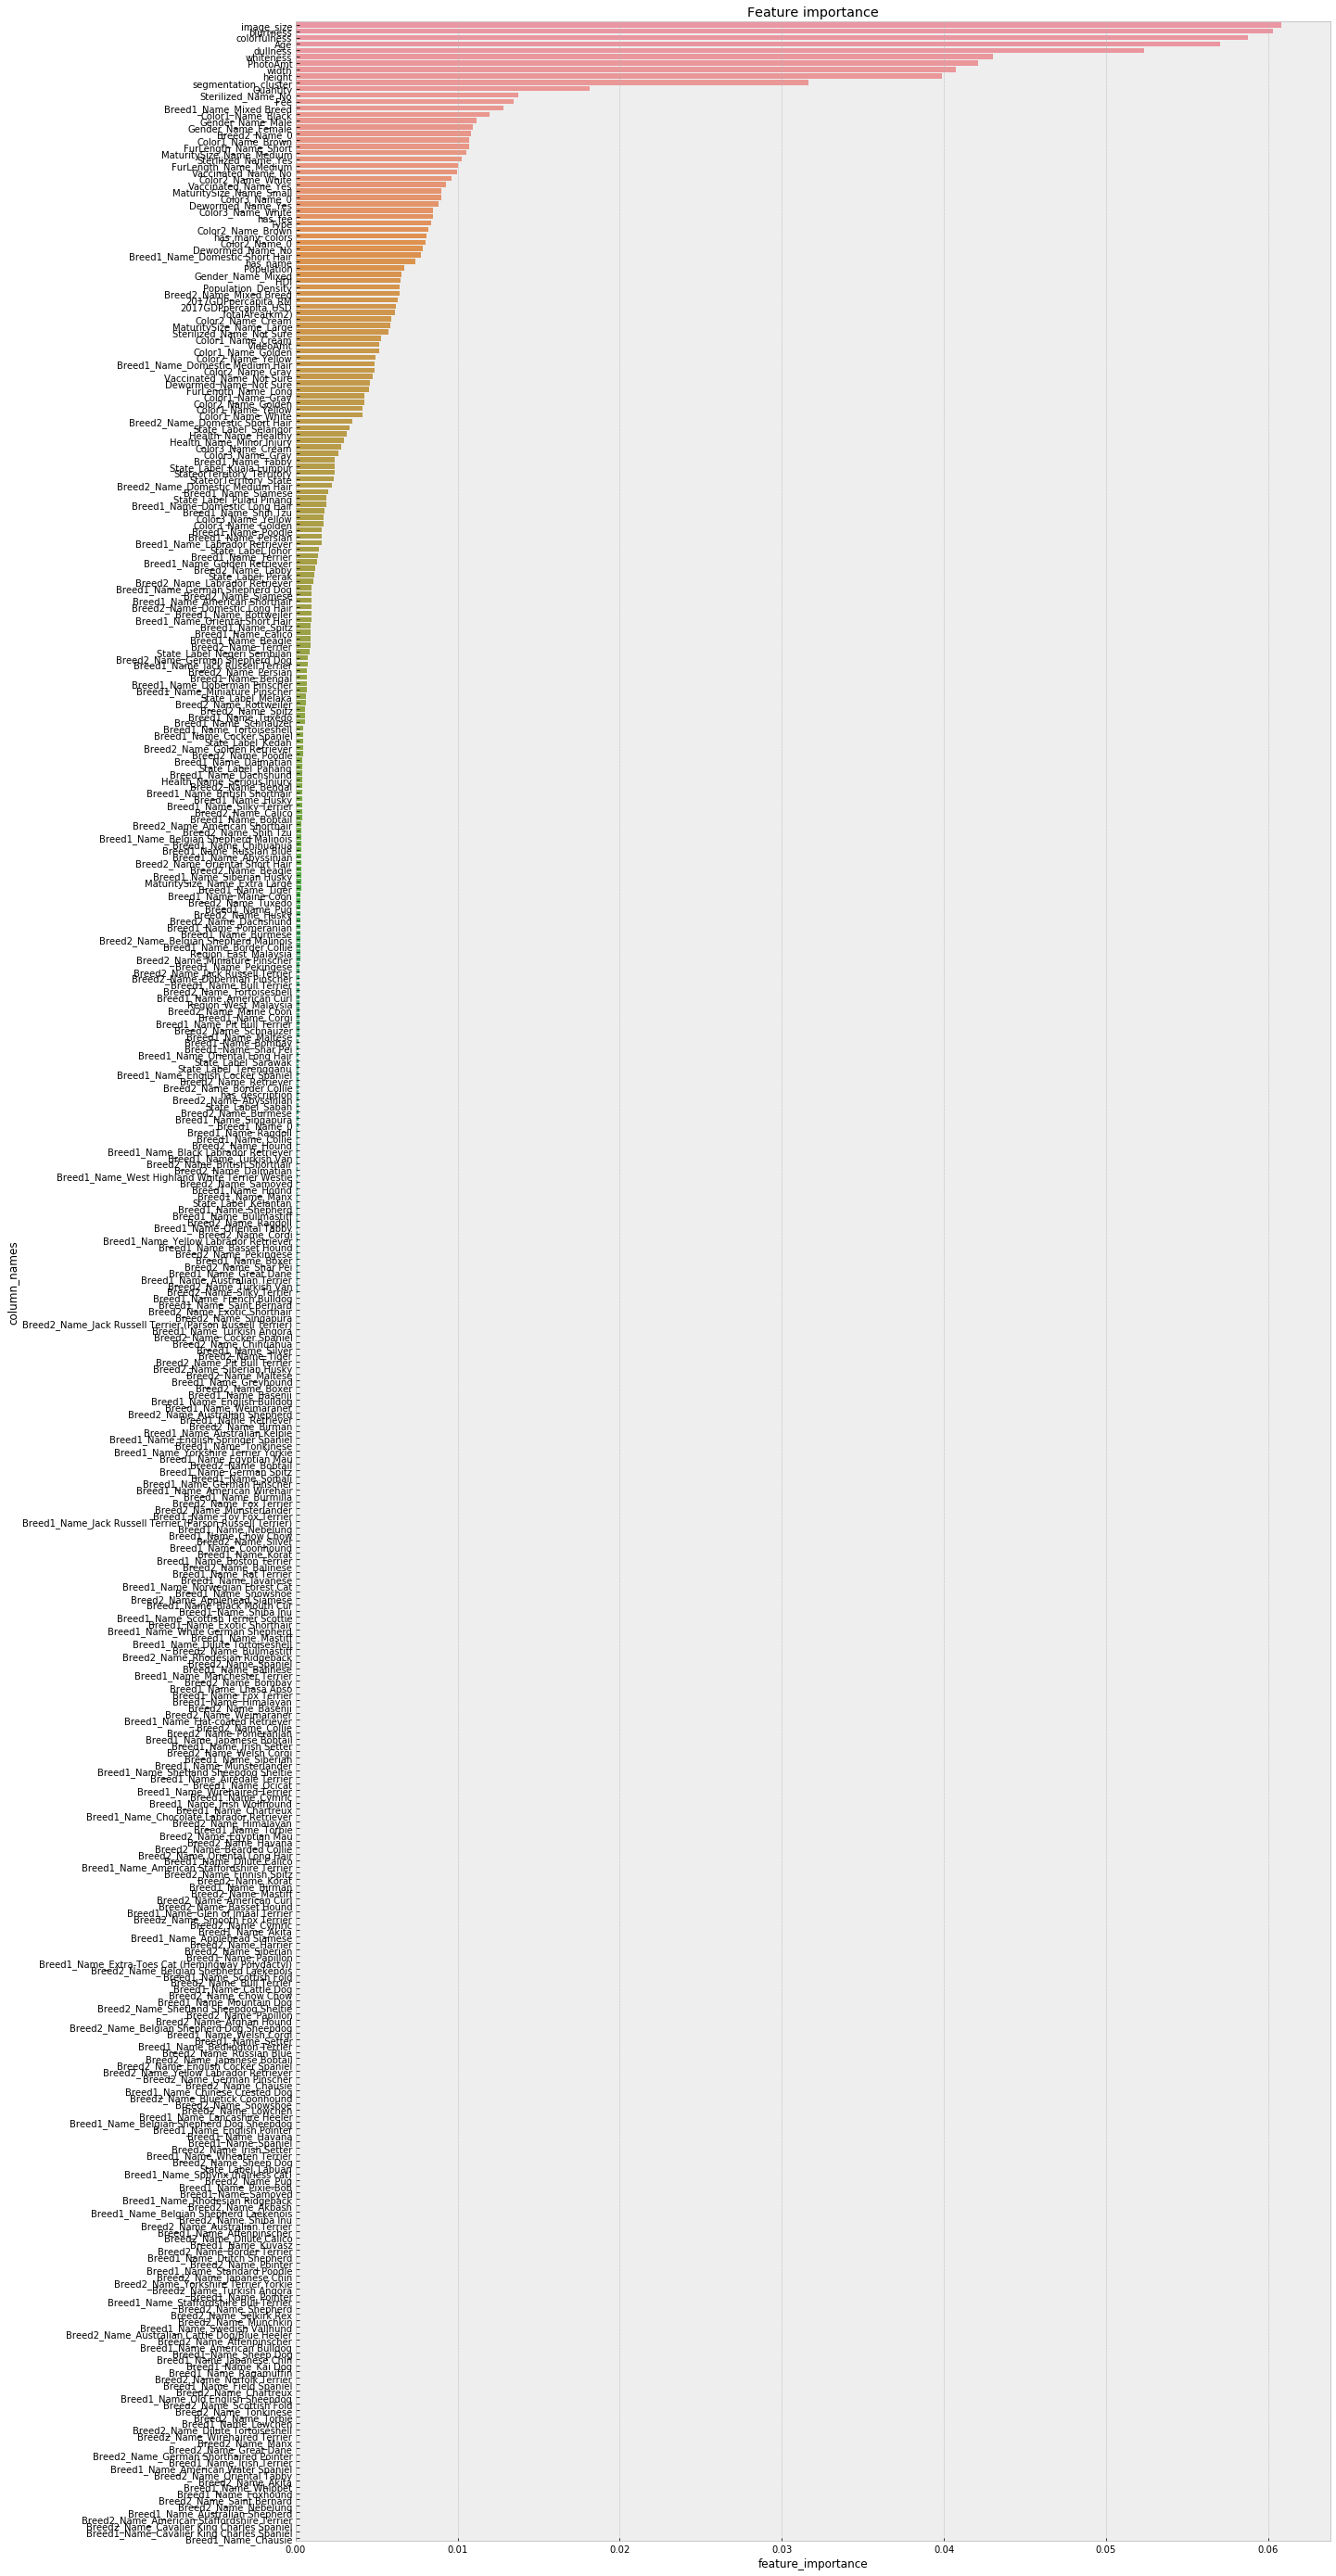

In [104]:
RF_feature_importance_df = pd.DataFrame({"column_names":x_train.columns, "feature_importance": RF.feature_importances_})
RF_feature_importance_df = RF_feature_importance_df.sort_values('feature_importance',ascending=False)
f, ax = plt.subplots(figsize=(20, 50))
sns.barplot(x="feature_importance", y="column_names", data=RF_feature_importance_df)
plt.title('Feature importance')

c:\users\sadeeb\anaconda3\envs\testing\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Text(0.5, 1.0, 'Top 25 Feature importance')

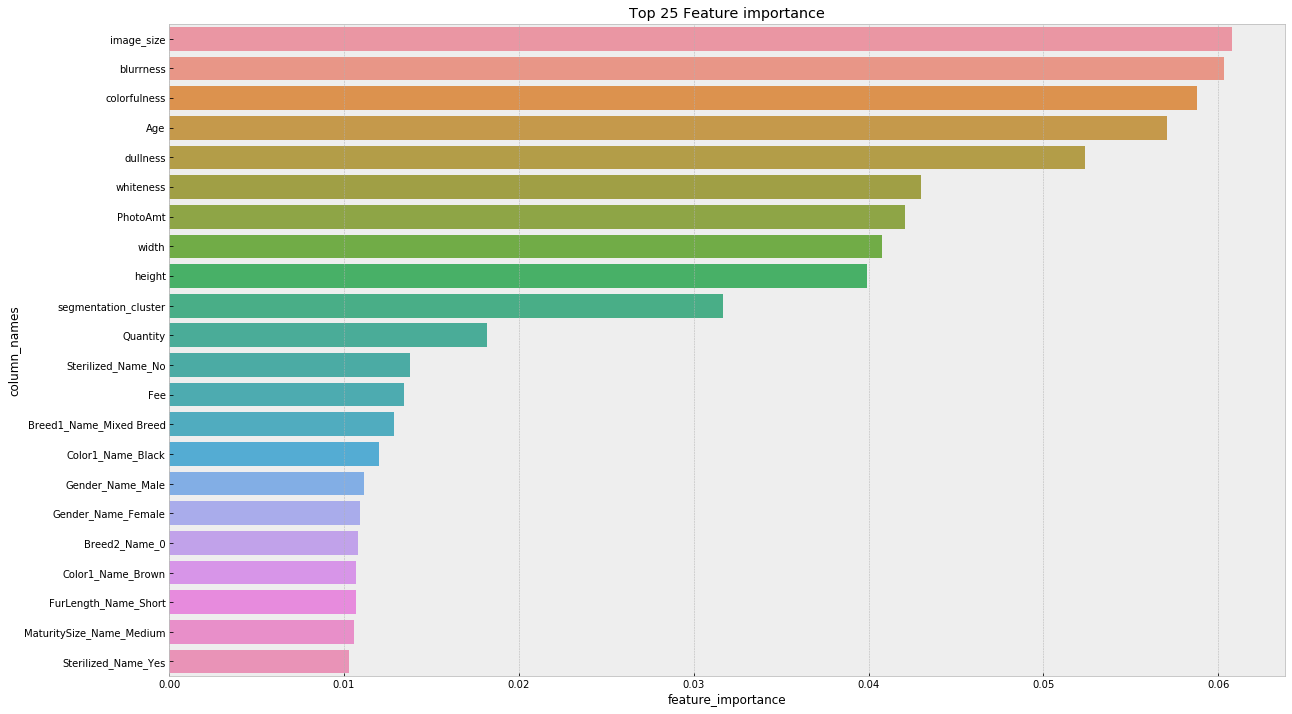

In [105]:
RF_feature_importance_df_filtered = (RF_feature_importance_df.sort_values('feature_importance',ascending=False)
                                     [RF_feature_importance_df['feature_importance']>=0.01])
f, ax = plt.subplots(figsize=(20, 12))
sns.barplot(x="feature_importance", y="column_names", data=RF_feature_importance_df_filtered)
plt.title('Top 25 Feature importance')

In [106]:
#XGBoost
best_XGB.fit(x_train, y_train)
y_pred_XGB = best_XGB.predict(x_test)

#how accuracy is it?
print("Accuracy Score \n", accuracy_score(y_test, y_pred_XGB))
print("Confusion Matrix", "\n",  confusion_matrix(y_test, y_pred_XGB))
print("Classification Report", "\n", classification_report(y_test, y_pred_XGB))

Accuracy Score 
 0.6668889629876625
Confusion Matrix 
 [[ 972  548]
 [ 451 1028]]
Classification Report 
               precision    recall  f1-score   support

           0       0.68      0.64      0.66      1520
           1       0.65      0.70      0.67      1479

   micro avg       0.67      0.67      0.67      2999
   macro avg       0.67      0.67      0.67      2999
weighted avg       0.67      0.67      0.67      2999



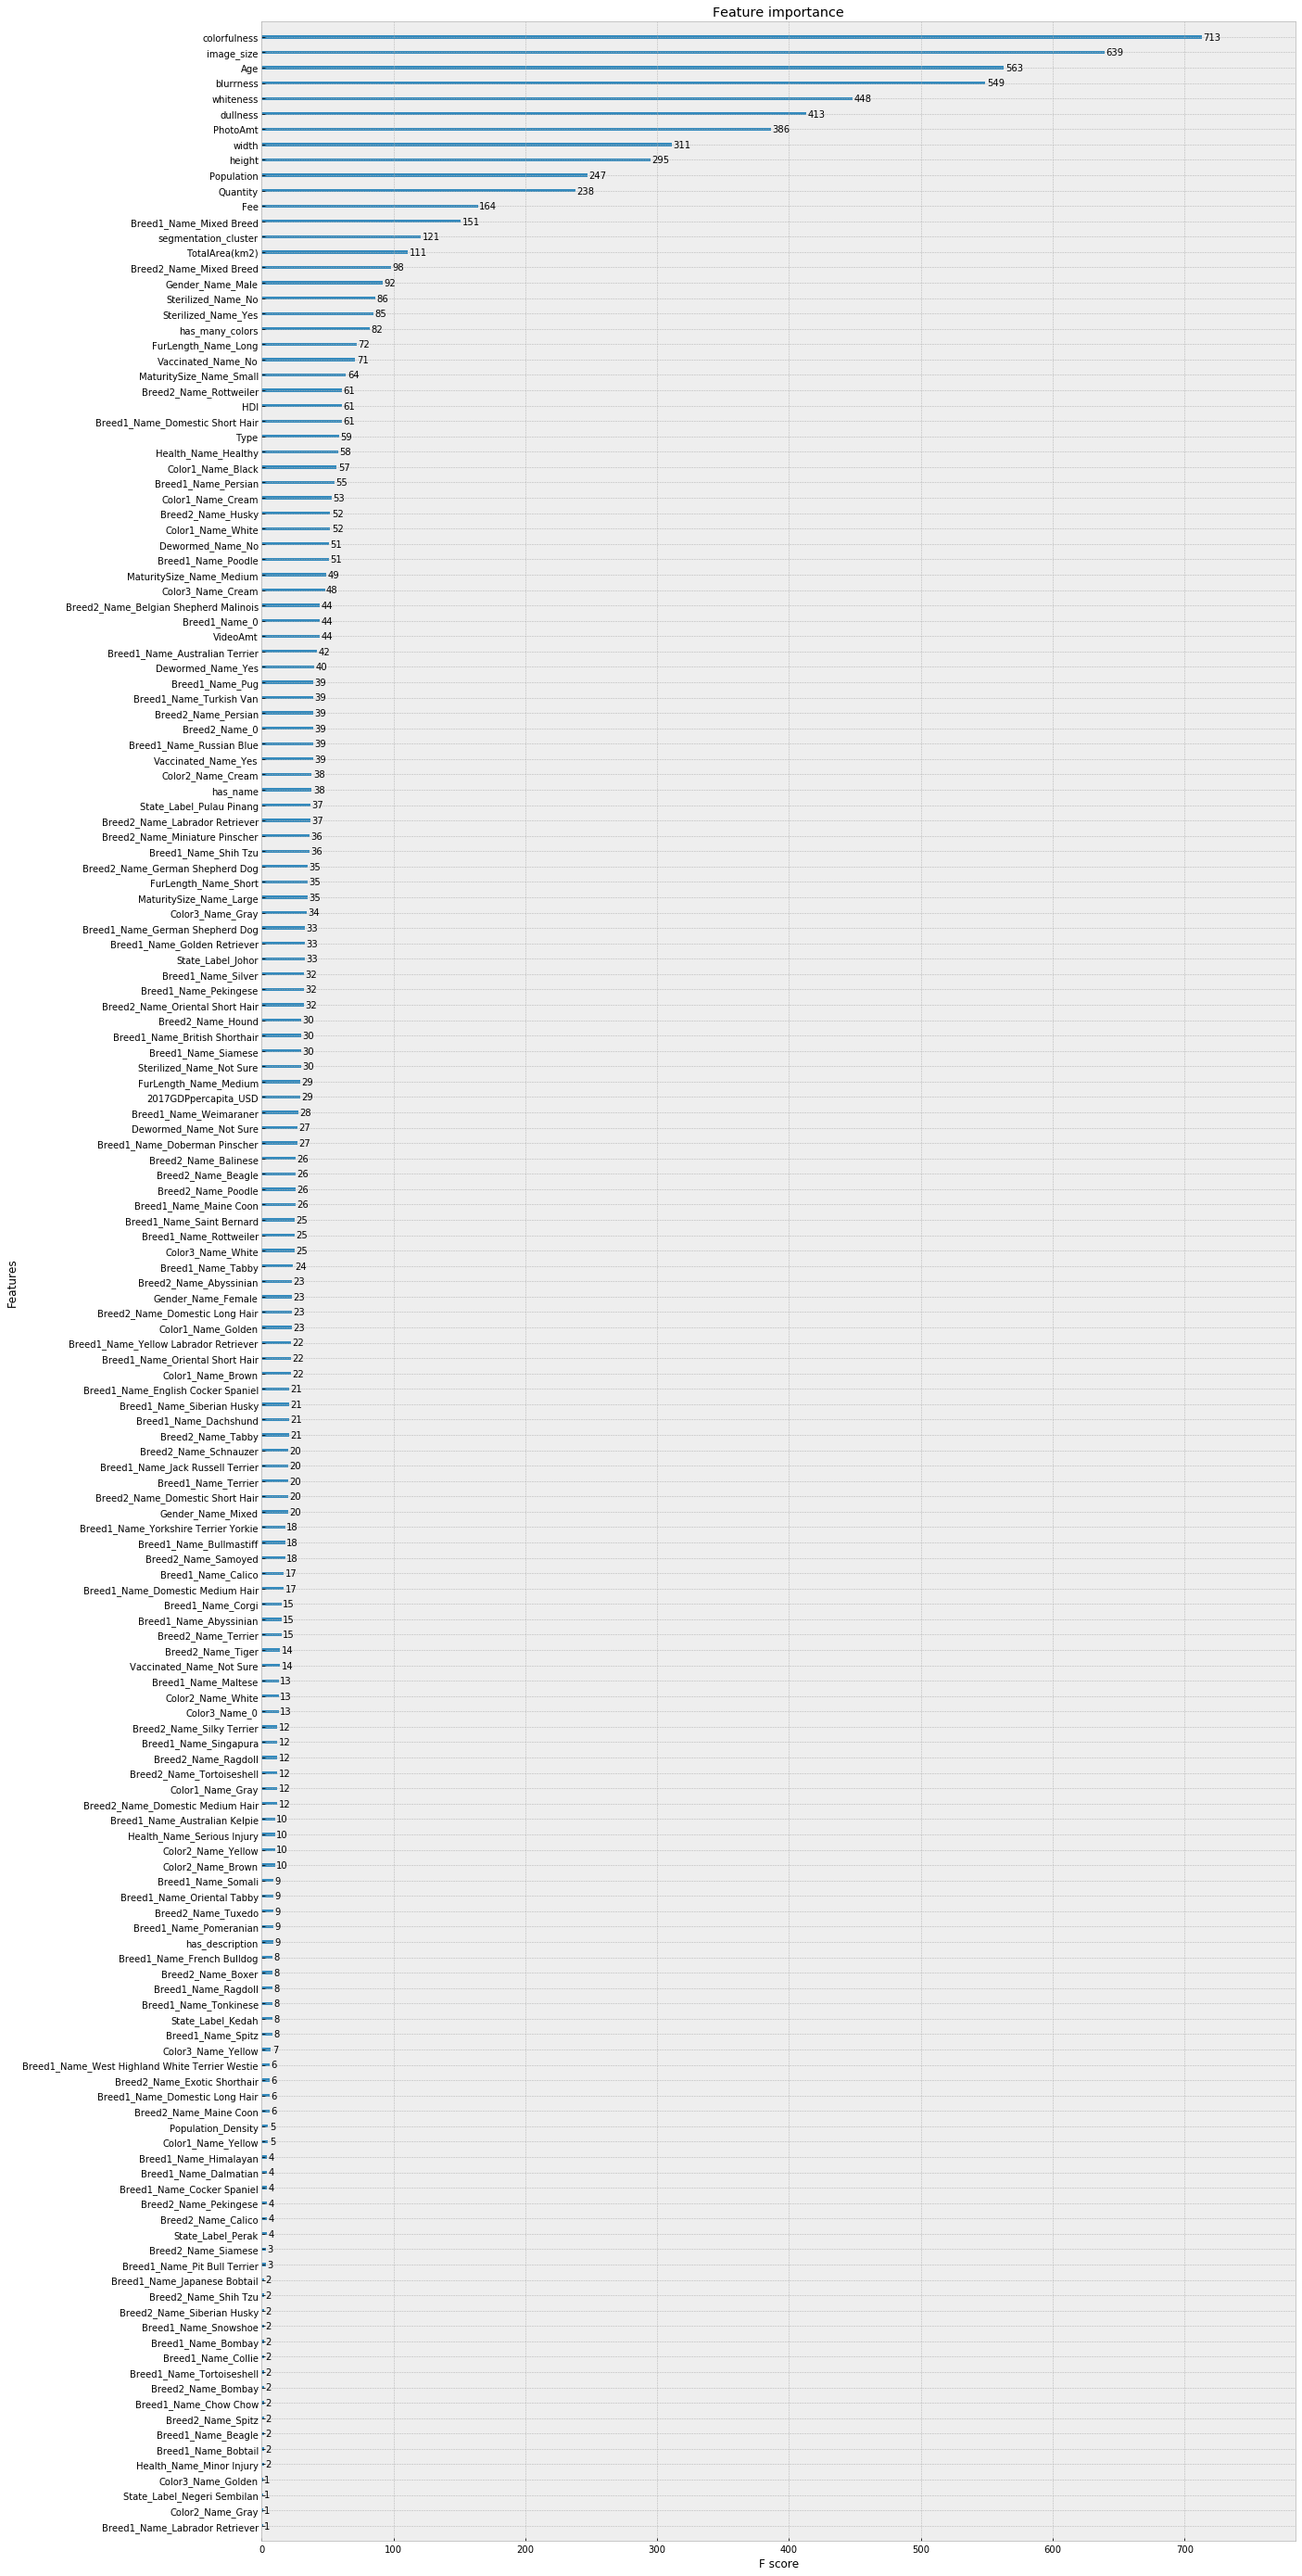

In [107]:
f, ax = plt.subplots(figsize=(20, 50))
xgb.plot_importance(bst, ax=ax)

Text(0.5, 1.0, 'Top 25 Feature importance')

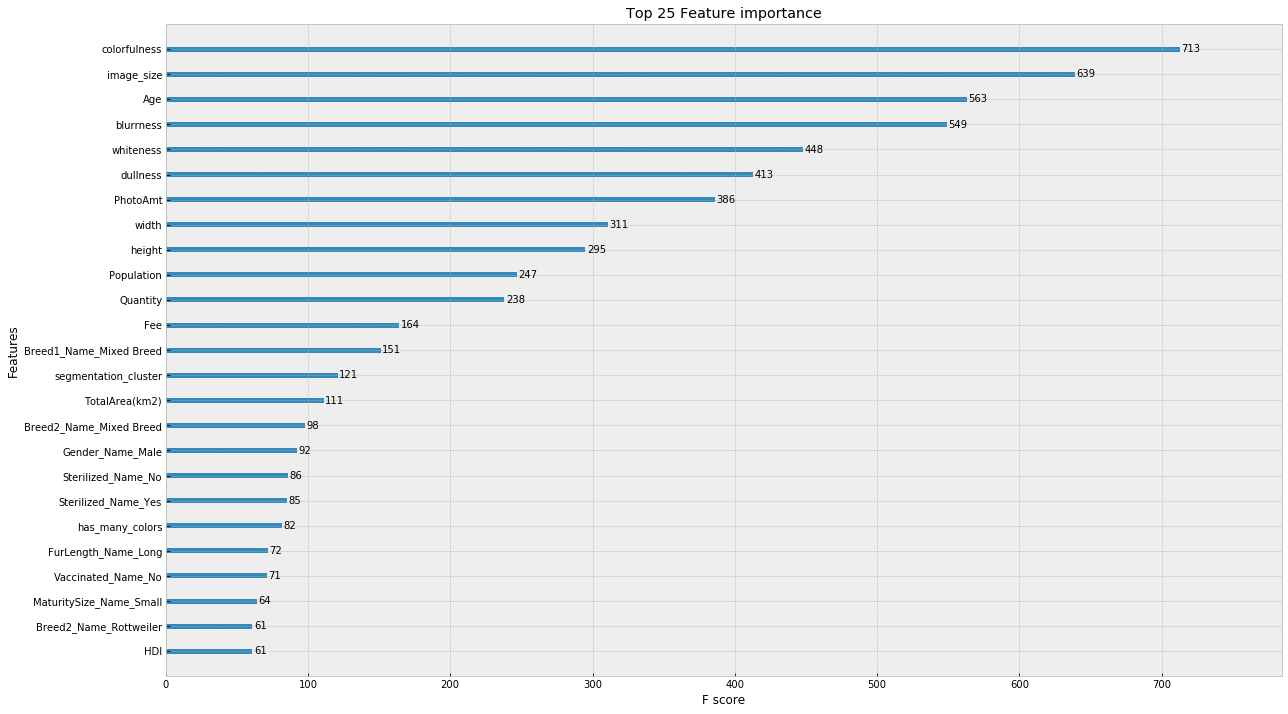

In [108]:
f, ax = plt.subplots(figsize=(20, 12))
xgb.plot_importance(bst, ax=ax, max_num_features= 25)
plt.title('Top 25 Feature importance')